# HOUSE PRICE PREDICTION USING 

It is supervised machine learning because data is in feature and label form.

we use linear regression beacause results in numerical form

* we are using housing dataset from UCI machine learning repository

In [1]:
# import required libraries
import numpy as np
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     505 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     504 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTRAT   506 non-null    float64
 11  B       506 non-null    float64
 12   LSTAT  506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# read value of any column and count
df['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [6]:
# describe data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,504.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554982,6.284634,68.583929,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115813,0.702617,28.138322,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.075000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.025000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Visualize data

In [7]:
# import matplotlib for ploting
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRAT'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':' LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

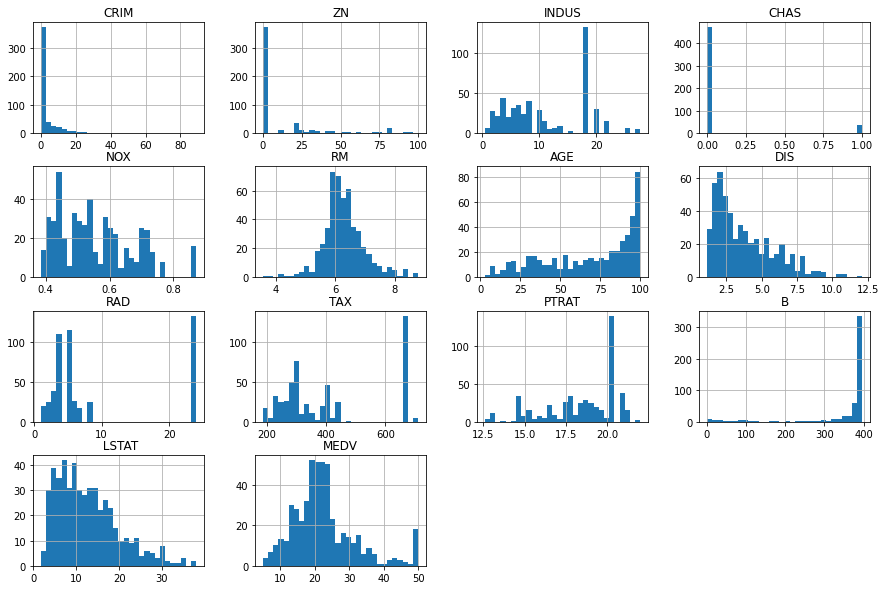

In [8]:
# histogram 
df.hist(bins = 30, figsize =(15,10))

# Looking Correlations

* correlation of attributes with median value(price).  What affects the price when the value increases or decreases of other attributes?

In [9]:
# coorelation using pandas
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV      1.000000
RM        0.695360
ZN        0.360445
B         0.333461
DIS       0.249929
CHAS      0.175260
AGE      -0.375717
RAD      -0.381626
CRIM     -0.388305
NOX      -0.429030
TAX      -0.468536
INDUS    -0.483725
PTRAT    -0.507787
 LSTAT   -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel=' LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel=' LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel=' LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel=' LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel=' LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel=' LSTAT'>,
        <AxesSubplot:xlabel=' LSTAT', ylabel=' LSTAT'>]], dtype=object)

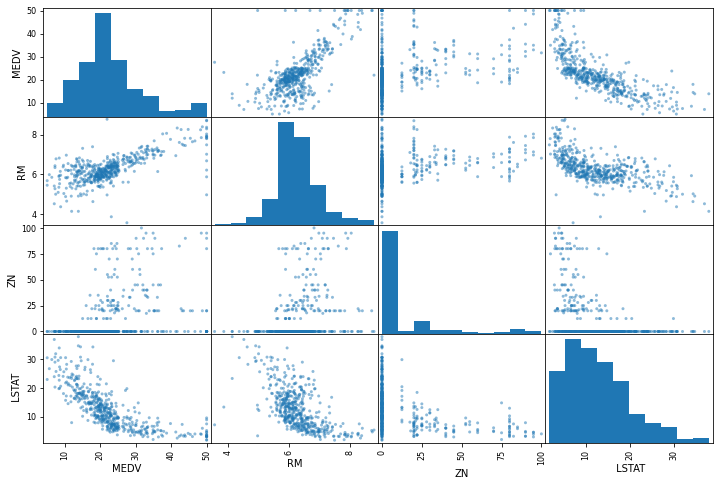

In [10]:
# ploting 
scatter = pd.plotting.scatter_matrix
attributes = ['MEDV', 'RM','ZN', ' LSTAT']
scatter(df[attributes], figsize=(12,8))

In [11]:
379/25

15.16

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

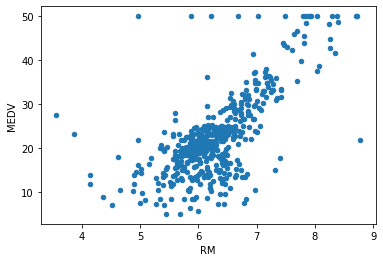

In [12]:
# we can see relation between two variables 
df.plot(kind='scatter', x='RM', y='MEDV')

## Missing Values and Outliers

In [13]:
# HERE SOME OUTLIERS, MEDV SAME ON DIFFERENT VALUE, WE CAN REMOVE OUTLIERS OR CHANGE VALUE IF HAVE RIGHT DATA
df.loc[df['MEDV'] == 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


Missing value - AGE has two missing value and NOX has one

* put value(o, mean, median) or remove full row 

In [14]:
# calculate median of all columns and put instead of missing value
# sklearn has impute class for do this
# imputer has fit and transform method 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [15]:
# show median of all columns
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [16]:
# create new dataFrame without missing value
median = imputer.transform(df)
data = pd.DataFrame(median, columns=df.columns)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554948,6.284634,68.61917,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115701,0.702617,28.08813,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.17500,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Train -Test Splitting

* split data into test dataset and train dataset


In [17]:
# import sklearn
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=4)

* data selction problem in one column 'CHAS' 
* if train data contain only 0 value not 1 then model will not working fine

In [19]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

* Split dataset using StratifiedShuffleSplit

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 4)
for train_index, test_index in ssplit.split(data, data['CHAS']):
    stra_train_set = data.loc[train_index]
    stra_test_set = data.loc[test_index]

In [21]:
stra_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [22]:
stra_test_set['CHAS'].value_counts()

0.0    95
1.0     7
Name: CHAS, dtype: int64

In [23]:
data_feature = stra_train_set.drop('MEDV', axis = 1)
data_label = stra_train_set['MEDV']

# Creating a Pipeline

### Feature Scaling

* scale all feature
Primarily, two types of feature scaling methods:
1. Min-Max scaling (Normalization)
    (value-min)/(max-min)
    sklearn provides a class called <b>MinMaxScaler</b>

2. Standardization
    (value - mean)/std
    sklearn provides a class called <b>Standard Scaler</b>

In [24]:
# add as many as we want in pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

In [25]:
data_tr = my_pipeline.fit_transform(data_feature)

In [26]:
data_tr.shape

(404, 13)

# Selecting a Desired Model

In [27]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()


In [28]:
model.fit(data_tr, data_label)

RandomForestRegressor()

In [29]:
some_data = data_feature[:5]
some_label = data_label[:5]

In [30]:
prepared_data = my_pipeline.transform(some_data)

In [31]:
model.predict(prepared_data)

array([12.188, 29.544, 21.41 , 23.145, 14.178])

In [32]:
list(some_label)

[10.9, 29.9, 21.2, 22.8, 13.3]

## EValuating the model

In [33]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(data_tr)
mse = mean_squared_error(data_label, predictions)
rmse = np.sqrt(mse)

In [34]:
rmse

1.3068794487497128

### Evaluation - Using Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, data_tr, data_label,  scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [36]:
rmse_scores

array([4.53063884, 2.29144865, 2.46178449, 3.17147704, 4.70434806,
       2.64467538, 4.08211703, 2.65974402, 3.90454129, 3.04692888])

In [37]:
def print_scores(scores):
    print('scores : ', scores)
    print('Mean : ', scores.mean())
    print('Standard Deviation : ', scores.std())

In [38]:
print_scores(rmse_scores)

scores :  [4.53063884 2.29144865 2.46178449 3.17147704 4.70434806 2.64467538
 4.08211703 2.65974402 3.90454129 3.04692888]
Mean :  3.349770370138832
Standard Deviation :  0.8413556949285675


1. LinearRegression Model <br> 
        rmse = 4.582541508095465
        rmse (using cross validation) = 
        array([5.29649599, 4.25618937, 4.33169454, 4.28471227, 5.94182587,
       4.8870602 , 4.81999738, 3.40383314, 6.16158133, 3.67354023])
2. DecisionTreeRegressor<br>
        rmse = 0.0 (overfiting)
        rmse (using cross validation) = 
        array([6.78587126, 3.22123291, 3.38497397, 6.39281227, 5.48076181,
       3.11636808, 7.79531911, 4.48678615, 5.11610203, 4.77663585])
3. RandomForestRegressor<br>
        rmse = 1.4
        rmse (using cross validation) =
        array([4.33312867, 2.34005224, 2.3407377 , 3.13674664, 4.6723225 ,
       2.67978714, 3.994178  , 2.75482102, 3.9600057 , 3.0950922 ])

In [39]:
from joblib import dump
dump(model, 'housing.joblib')

['housing.joblib']

## Testing the model on the test data

In [40]:
test_feature = stra_test_set.drop('MEDV', axis = 1)
test_label = stra_test_set['MEDV']

In [41]:
test_prepared = my_pipeline.transform(test_feature)
final_predictions = model.predict(test_prepared)

In [42]:
final_mse = mean_squared_error(test_label, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.620396235491465

In [43]:
print(final_predictions,'\n\n', list(test_label))

[11.264 20.504 22.248 14.52  27.845 18.879 16.351 26.76  26.661 24.075
 44.245 43.08  22.319 24.049 47.985 26.169 33.227 15.454 31.448 23.503
 31.73  22.268 22.541 22.168 20.096 20.777 14.043 19.499 21.71  48.071
  8.038 19.236  8.238 15.241 20.207 21.117 11.228 24.354 30.505 18.259
 15.761 40.337 16.193 41.821 17.42  14.401 20.693  8.962 35.016 32.799
 39.965 35.608 34.088 13.72  32.37  27.36  19.99   8.901 25.977 22.021
 21.874 27.502 26.305 19.719 22.439 18.962 15.413 15.116 18.549 23.826
 21.246 13.347 20.221 13.722 20.249 10.688 26.691 21.666 16.73  25.572
 22.342 47.841 30.807 35.11  22.87  15.246 15.983 21.109 22.617 21.86
 22.913 29.397 19.725 16.419 14.852 21.439 29.378 27.152 27.894 20.664
 10.996 19.554] 

 [11.0, 19.6, 25.0, 13.4, 22.0, 19.6, 15.7, 26.6, 29.4, 23.4, 50.0, 43.8, 19.1, 28.1, 50.0, 27.5, 33.8, 19.4, 37.0, 24.7, 30.3, 20.5, 21.4, 22.6, 20.4, 19.7, 16.7, 18.9, 21.0, 45.4, 7.4, 20.5, 5.0, 15.6, 23.1, 18.5, 7.5, 25.2, 23.9, 23.1, 13.5, 50.0, 15.2, 21.9, 20.1, 12.7

In [44]:
prepared_data[0]

array([ 3.92292215, -0.48688269,  1.03401929, -0.27288841,  1.1044268 ,
       -0.10600147,  0.37085586, -0.93576444,  1.6656792 ,  1.54540449,
        0.81029478, -3.6832569 ,  0.2444329 ])